<a href="https://colab.research.google.com/github/SachinScaler/May25_Intro_to_ML_NN/blob/main/ML_Linear_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task1: Experiment Weight Analysis
Imagine you trained a linear regression model with two features and found the following weights and intercept:
- Intercept = 10
- Weight for x1 = 2
- Weight for x2 = -5

1) what would the final linear regression equation would look like?
2) Can you create a python function to calculate 'y' for given x values and weights.

3) Try these values and calculate the output
- initial_x1 = 3
- initial_x2 = 4

4) Weight Impact analysis:
- Add 1 unit to only initial_x1 and see how the output change.
- Subtract 1 unit from initial_x1 and see how the output change.
- Add 1 unit to initial_x2 and see how the output change.
- Subtract 1 unit from initial_x2 and see how the output change.

5) Extra: Change weights and repeat experiment to see how weights impact the output. How does magnitude and sign of weight(negative vs positive) impact the output.

**Summarize your findings**






### Task 2: Calculate a Partial Derivative

**Given Function:**
Consider the following multivariable function:

$f(x, y) = (a \cdot x + b \cdot y + z)^2$

where $a$ and $b$ are constants.

**Instructions:**

1.  **Calculate the Partial Derivative:**
    Determine the partial derivative of the function $f(x, y, z)$ with respect to $x$ $y$ and $z$ i.e.  $\frac{\partial}{\partial x} f(x, y, z)$.
    $\frac{\partial}{\partial y} f(x, y, z)$.
      $\frac{\partial}{\partial z} f(x, y, z)$.


Note: if possible, share step-by-step derivation of your solution on whatsapp. Make sure to explicitly state when you apply rules like the chain rule and how you treat other variables (e.g., $y$, $a$, $b$) as constants during the differentiation process.


In [1]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/SachinScaler/May25_Intro_to_ML_NN/refs/heads/main/cars24-car-price.csv'
df = pd.read_csv(url)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.head() # x_odo - min_odo/ (max_odo - min-odo)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


### Linear Regression SKlearn

In [3]:
from sklearn.model_selection import train_test_split

y = df['selling_price']

X = df.drop(columns=['selling_price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15856, 17), (3964, 17), (15856,), (3964,))

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) # model training

LinearRegression()

In [5]:
model.score(X_train, y_train) # r2_score

0.9453672329447975

In [6]:
model.score(X_test, y_test) # r2_score

0.9466197443095884

In [7]:
list1 = list(zip(model.coef_, X_test.columns))
list1

[(np.float64(0.1226217721609539), 'year'),
 (np.float64(-0.5866534693257848), 'km_driven'),
 (np.float64(-0.24424603750909132), 'mileage'),
 (np.float64(0.0886440514012702), 'engine'),
 (np.float64(0.031587016664545046), 'max_power'),
 (np.float64(-0.12262177216095488), 'age'),
 (np.float64(0.06635952353976018), 'make'),
 (np.float64(0.8587920281822948), 'model'),
 (np.float64(-0.005809263711441663), 'Individual'),
 (np.float64(-0.008055304989537297), 'Trustmark Dealer'),
 (np.float64(0.00583860985419279), 'Diesel'),
 (np.float64(0.12024489660021813), 'Electric'),
 (np.float64(0.016136570191452405), 'LPG'),
 (np.float64(-0.009718557065529909), 'Petrol'),
 (np.float64(-0.004543180937354464), 'Manual'),
 (np.float64(-0.012509503832476307), '5'),
 (np.float64(-0.020552278154728515), '>5')]

In [8]:
sorted(list1, key = lambda x: abs(x[0]) , reverse = True)

[(np.float64(0.8587920281822948), 'model'),
 (np.float64(-0.5866534693257848), 'km_driven'),
 (np.float64(-0.24424603750909132), 'mileage'),
 (np.float64(-0.12262177216095488), 'age'),
 (np.float64(0.1226217721609539), 'year'),
 (np.float64(0.12024489660021813), 'Electric'),
 (np.float64(0.0886440514012702), 'engine'),
 (np.float64(0.06635952353976018), 'make'),
 (np.float64(0.031587016664545046), 'max_power'),
 (np.float64(-0.020552278154728515), '>5'),
 (np.float64(0.016136570191452405), 'LPG'),
 (np.float64(-0.012509503832476307), '5'),
 (np.float64(-0.009718557065529909), 'Petrol'),
 (np.float64(-0.008055304989537297), 'Trustmark Dealer'),
 (np.float64(0.00583860985419279), 'Diesel'),
 (np.float64(-0.005809263711441663), 'Individual'),
 (np.float64(-0.004543180937354464), 'Manual')]

In [9]:
imp = pd.DataFrame(list(zip(X_test.columns, np.abs(model.coef_))),
                   columns=['feature', 'abs_coeff'])

imp

,feature,abs_coeff
0,year,0.122622
1,km_driven,0.586653
2,mileage,0.244246
3,engine,0.088644
4,max_power,0.031587
5,age,0.122622
6,make,0.066360
7,model,0.858792
8,Individual,0.005809
9,Trustmark Dealer,0.008055


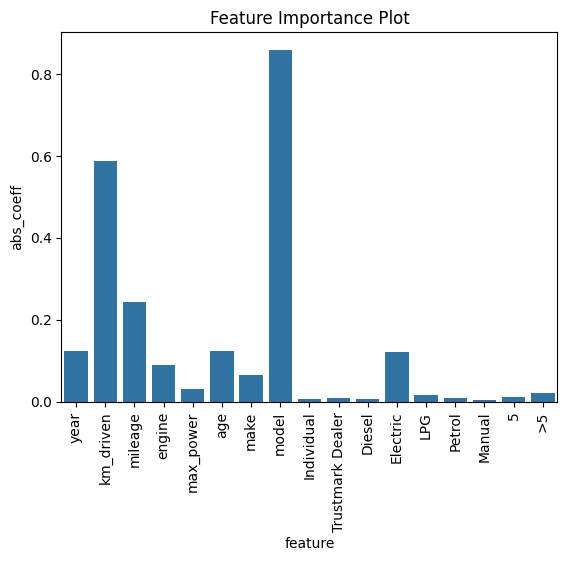

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.barplot(x='feature', y='abs_coeff', data=imp)
plt.xticks(rotation=90)
plt.title("Feature Importance Plot")
plt.show()

In [11]:
# select row with max value of abs_coeff
imp[imp['abs_coeff'] == max(imp.abs_coeff)]


,feature,abs_coeff
7,model,0.858792


In [12]:
imp[imp['abs_coeff'] == min(imp.abs_coeff)]

,feature,abs_coeff
14,Manual,0.004543


In [13]:
import numpy as np


class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=100):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def predict(self, X):
        return np.dot(X, self.W) + self.b

    def score(self, X, y):
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred)**2) # (actual - pred) ** 2
        ss_tot = np.sum((y - np.mean(y))**2) # (actual - mean)** 2
        score = (1 - ss_res/ss_tot)
        return score

    # update of w and w0:
    def update_weights(self):
        Y_pred = self.predict( self.X )
        # calculate gradients
        # Xt.MSE
        dW = - (2*(self.X.T ).dot(self.Y - Y_pred))/self.m
        db = - 2*np.sum(self.Y - Y_pred)/self.m

        # print(self.X.shape, (self.Y-Y_pred).shape, dW.shape)
        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

    def fit(self, X, Y):
        pass # full training using Batch Gradient Descent
        '''
        step1: weight and bias initialization
        remember weights should be a vector of same dim
        as input input feature len ie cols of Matrix X
        and bias a scalar value
        '''
        self.m, self.d = X.shape # num_rows and num_cols




        '''
        Step 2 and 3: Loop and update
        Loop over num_iterations, calculate gradients and update
        weights and bias
        '''



        '''
        Additional Optional Step: for monitoring the training
        At each iteration, run predictions and calculate errors
        and store them in a list
        Plot the Error vs iteration as line plot after training finishes
        '''


### TODO:
### derivative caclculation
### fit method

In [14]:
""

''

In [15]:
lr = LinearRegression(iterations=1000)
lr.fit(X_train, y_train)
lr.predict(X_test)

AttributeError: 'LinearRegression' object has no attribute 'W'

In [ ]:
lr.score(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
lr.W

In [ ]:
lr.b

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()